## Recognizing handwritten digits with KNN

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets,metrics

warnings.filterwarnings('ignore')
%matplotlib inline

### Load digits dataset

In [2]:
digits = datasets.load_digits()

### Dataset description

In [3]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

### Visualizing data values

In [4]:
digits.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

### Visualizing class values

In [5]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### Visualizing images and classes

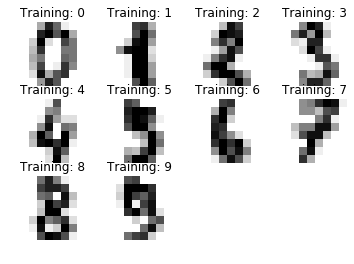

In [6]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(3, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

### Converting from dataset to dataframe

In [7]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
category = digits.target

In [8]:
dataset = pd.DataFrame(data)
dataset['category'] = category

In [9]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,category
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


### Splitting training and test data 

In [11]:
X_train, X_test, y_train, y_test = train_test_split(dataset.drop('category',axis=1),dataset['category'],test_size=0.3)

### Checking data shape

In [12]:
X_train.shape,X_test.shape

((1257, 64), (540, 64))

In [13]:
y_train.shape,y_test.shape

((1257,), (540,))

### Instantiating KNN model

In [14]:
knn = KNeighborsClassifier(n_neighbors=3)

### Training model

In [16]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

### Predicting new points

In [17]:
result = knn.predict(X_test)

### Classification metrics

In [19]:
print(metrics.classification_report(y_test,result))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        57
           1       0.98      1.00      0.99        53
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        51
           4       1.00      1.00      1.00        58
           5       0.96      0.98      0.97        48
           6       0.98      1.00      0.99        55
           7       1.00      1.00      1.00        56
           8       0.98      0.98      0.98        60
           9       1.00      0.95      0.97        57

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



### Confusion matrix

In [21]:
print (pd.crosstab(y_test,result, rownames=['actual'], colnames=['          prediction'], margins=True))

          prediction   0   1   2   3   4   5   6   7   8   9  All
actual                                                           
0                     57   0   0   0   0   0   0   0   0   0   57
1                      0  53   0   0   0   0   0   0   0   0   53
2                      0   0  45   0   0   0   0   0   0   0   45
3                      0   0   0  51   0   0   0   0   0   0   51
4                      0   0   0   0  58   0   0   0   0   0   58
5                      0   0   0   0   0  47   1   0   0   0   48
6                      0   0   0   0   0   0  55   0   0   0   55
7                      0   0   0   0   0   0   0  56   0   0   56
8                      0   1   0   0   0   0   0   0  59   0   60
9                      0   0   0   0   0   2   0   0   1  54   57
All                   57  54  45  51  58  49  56  56  60  54  540


### Optimizing K parameter

In [22]:
from sklearn.model_selection import GridSearchCV

### Defining a list of values for the parameter

In [23]:
k_list = list(range(1,31))

In [24]:
k_values = dict(n_neighbors=k_list)
k_values

{'n_neighbors': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30]}

### Initializing GridSearch object

In [25]:
grid = GridSearchCV(knn, k_values, cv=5, scoring='accuracy')

### Training the object

In [26]:
grid.fit(dataset.drop('category',axis=1),dataset['category'])

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

### Visualizing score values

In [27]:
grid.cv_results_

{'mean_fit_time': array([0.0047236 , 0.00312476, 0.00312495, 0.00937233, 0.        ,
        0.00312433, 0.00312452, 0.        , 0.00312486, 0.00159969,
        0.00312572, 0.00312514, 0.00312481, 0.0031249 , 0.00312514,
        0.00159993, 0.00160027, 0.        , 0.00159984, 0.00632439,
        0.00472441, 0.        , 0.        , 0.00937366, 0.00312557,
        0.        , 0.        , 0.00312443, 0.        , 0.00624852]),
 'std_fit_time': array([0.00626734, 0.00624952, 0.0062499 , 0.00765248, 0.        ,
        0.00624866, 0.00624905, 0.        , 0.00624971, 0.00319939,
        0.00625143, 0.00625029, 0.00624962, 0.00624981, 0.00625029,
        0.00319986, 0.00320053, 0.        , 0.00319967, 0.00586652,
        0.00626845, 0.        , 0.        , 0.00765357, 0.00625114,
        0.        , 0.        , 0.00624886, 0.        , 0.00765285]),
 'mean_score_time': array([0.02210879, 0.01562381, 0.01562514, 0.01562424, 0.01562529,
        0.02187328, 0.01874962, 0.021874  , 0.02236938, 0.01

In [28]:
print("Best value of k = {} with accuracy value of {}".format(grid.best_params_,grid.best_score_))

Best value of k = {'n_neighbors': 2} with accuracy value of 0.9671711544413494


### Visualizing K values and accuracy

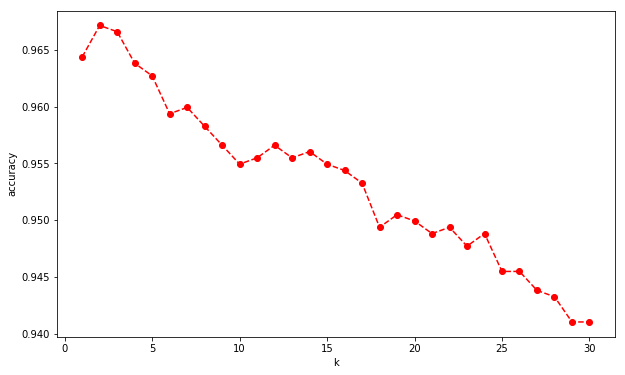

In [29]:
scores=[]
for score in grid.cv_results_['mean_test_score']:
    scores.append(score)

plt.figure(figsize=(10,6))
plt.plot(k_list,scores,color='red',linestyle='dashed',marker='o')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()